## 匯入資料

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
df = pd.read_csv("E:/data/CC GENERAL.csv")
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

## 檢查資料

In [5]:
print(df.isnull().values.sum())
print("資料筆數:", df.shape)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])

314
資料筆數: (8950, 18)
資料的欄位名稱，分別是: Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
第一筆的資料內容: CUST_ID                                 C10001
BALANCE                              40.900749
BALANCE_FREQUENCY                     0.818182
PURCHASES                                 95.4
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                    95.4
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                   0.166667
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.083333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX          

## 建立模型

In [6]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

## 訓練與預測模型

In [7]:
model.fit_predict(df[['BALANCE','PAYMENTS']])

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
df["群"] = model.labels_
print(df["群"].value_counts())
print(df.groupby('群').mean()) 

1    6669
0    2218
2      63
Name: 群, dtype: int64
       BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
群                                                                   
0  3871.675576           0.953830   1862.302885       1186.169698   
1   760.597889           0.852052    619.975911        318.706127   
2  5432.475492           0.851501  11325.017619       8665.697143   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
群                                                              
0              676.471632   2413.471127             0.501659   
1              301.556778    431.144612             0.485328   
2             2659.669683   8452.604423             0.623954   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
群                                                                 
0                    0.296812                          0.367228   
1                    0.168385                          0.362313   
2            

## 繪製分群結果圖

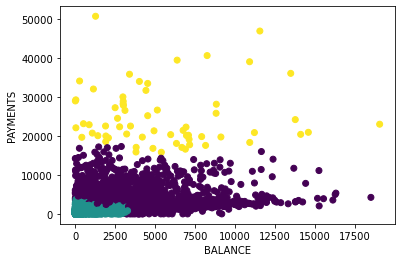

In [9]:
y = model.fit_predict(df[['BALANCE','PAYMENTS']])
s = plt.scatter(df[['BALANCE']],df[['PAYMENTS']],c= y)
plt.xlabel("BALANCE")
plt.ylabel("PAYMENTS")
plt.show()

## 更換模型計算距離公式

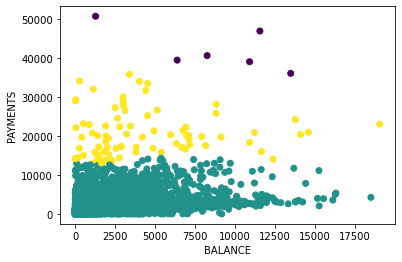

In [10]:
model=AgglomerativeClustering(n_clusters=3,affinity='manhattan',linkage='average')
y=model.fit_predict(df[['BALANCE','PAYMENTS']])
plt.scatter(df[['BALANCE']],df[['PAYMENTS']],c=y)
plt.xlabel("BALANCE")
plt.ylabel("PAYMENTS")
plt.show()